### The Correlation Coefficient

The correlation coefficient measures the extent to which the relationship between two variables is linear. It's value is always between -1 and 1. A positive coefficient indicates that the variables are directly related. A negative coefficient indicates that the variables are inversely related, when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the two.

The Correlation Coefficient of `X` and `Y` is defined as $r = \frac{Cov(X,Y)}{std(X)std(Y)}$

#### Correlation vs Covariance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [5]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.1863140537538728

In [6]:
# Compare the correlation and covariance of two series.
X = np.random.rand(50)
Y = 2 * X + 4

print("Covariance of X and Y: \n" + str(np.cov(X, Y)))
print("Correlation of X and Y: \n" + str(np.corrcoef(X, Y)))

Covariance of X and Y: 
[[0.06363678 0.12727356]
 [0.12727356 0.25454711]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


Both np.cov and np.corrcoef return matrices because for each input variable we have one row and one column. The diagonal is just the variance of that variable. 

In [7]:
cov_matrix = np.cov(X, Y)

error = cov_matrix[0, 0] - X.var(ddof=1)

print("error:", str(error))

error: 1.3877787807814457e-17


Correlation:  -0.11772263263489777
Built-in Correlation:  -0.11536817998219981


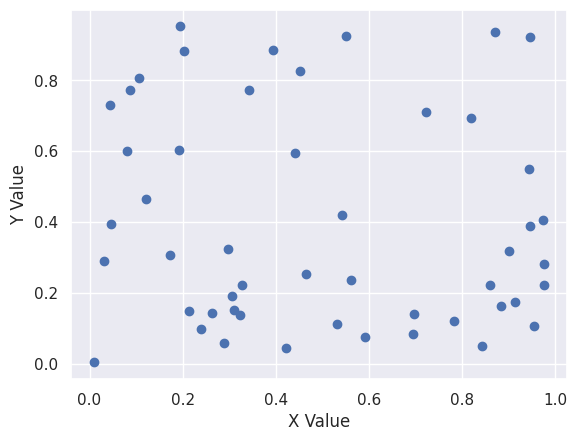

In [8]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X, Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
print('Correlation: ', np.cov(X, Y)[0, 1] / (np.std(X) * np.std(Y)))

print("Built-in Correlation: ", str(np.corrcoef(X, Y)[0, 1]))

Two correlated sets of data

Correlation: 0.936714745406417


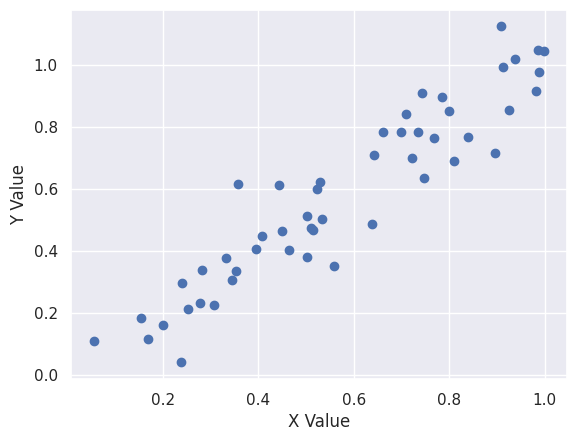

In [9]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X, Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")

print("Correlation:", np.corrcoef(X, Y)[0, 1])

Introduce some noise

Correlation: 0.8394308055915181


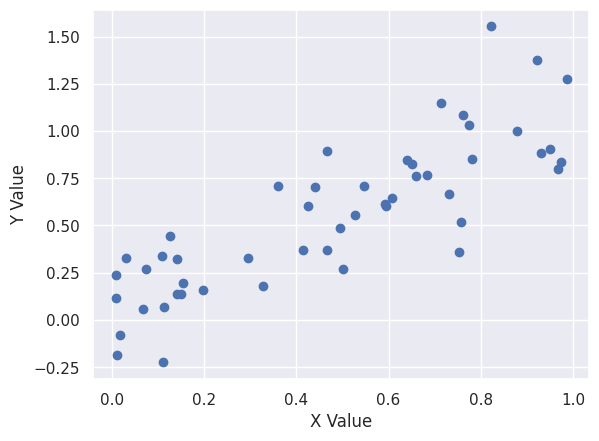

In [10]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")

print("Correlation:", str(np.corrcoef(X, Y)[0, 1]))

Inverse relationship 

Correlation: -0.9557490789151308


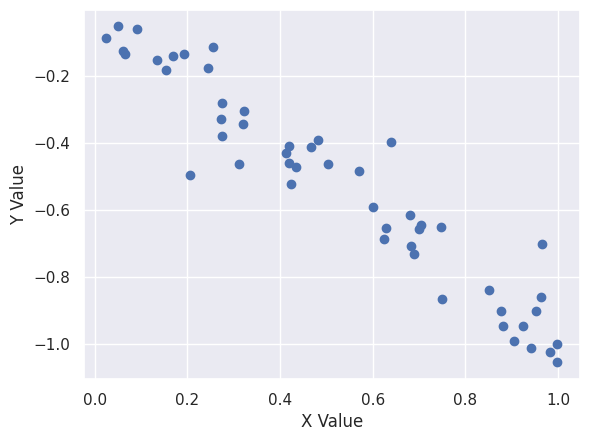

In [11]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

plt.scatter(X, Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")

print("Correlation:", np.corrcoef(X, Y)[0, 1])

#### How is this useful in finance?

Determining related assets

In [2]:
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlation coefficients
LRCX and AAPL: 0.9595011998645103
LRCX and SPY: 0.9339471043993599
AAPL and SPY: 0.9007672577181668


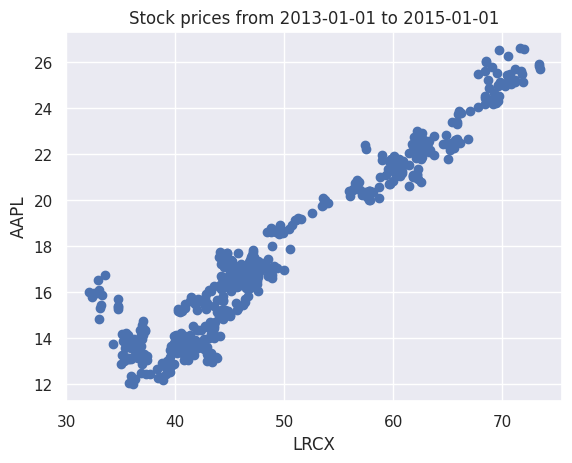

In [13]:
start = '2013-01-01'
end = '2015-01-01'
bench = yf.download('^GSPC', start=start, end=end)['Adj Close']
a1 = yf.download('LRCX', start=start, end=end)['Adj Close']
a2 = yf.download('AAPL', start=start, end=end)['Adj Close']

plt.scatter(a1, a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print("Correlation coefficients")
print("LRCX and AAPL:", np.corrcoef(a1, a2)[0, 1])
print("LRCX and SPY:", np.corrcoef(a1, bench)[0, 1])
print("AAPL and SPY:", np.corrcoef(bench, a2)[0, 1])

Constructing a portfolio of uncorrelated assets

It's really hard to determine whether or not a correlation is significant, especially when they are not normally distributed.
As an example, remember that the correlation of AAPL and LRCX was 0.95. let's take the rolling 60 day correlation between the two to see how that varies.

Text(0, 0.5, '60-day Rolling Correlation')

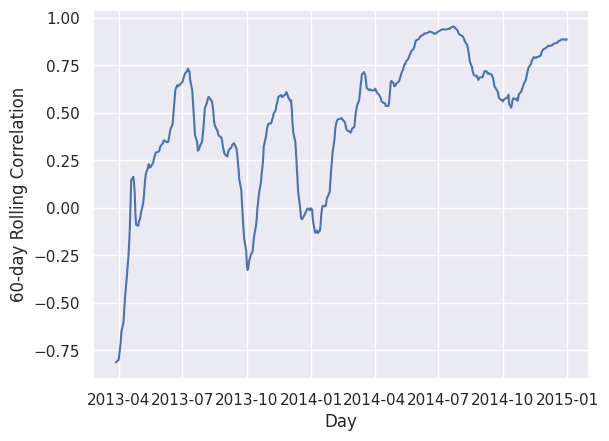

In [14]:
rolling_correlation = a1.rolling(60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

##### Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different ways.
Additionally, the correlation coefficient can be very sensitive to outliers. Including or excluding even a couple of datapoints can alter the result.

0.2695800214605444

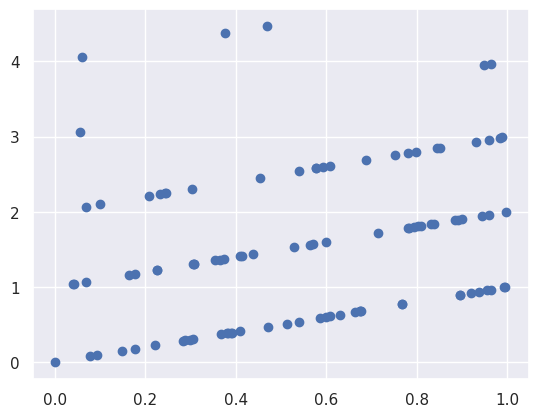

In [15]:
# Noise distribution poisson
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

### Exercises

In [15]:
def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0, 1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Dependence of Artificial Variables

In [40]:
A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)

covariance_matrix = np.cov(A, B)
correlation_matrix = np.corrcoef(A, B)

print("Covariance of A and B:", covariance_matrix[0, 1])
print("Correlation between A and B:", correlation_matrix[0, 1])

A_var = covariance_matrix[0, 0]
B_var = covariance_matrix[1, 1]
print(A_var, B_var)


Covariance of A and B: -0.29380183616204963
Correlation between A and B: -0.9989914187215853
0.09801903111316149 0.8824194876049838


In [41]:
C = np.random.rand(100)
D = np.random.normal(0, 0.5, 100)

covariance_matrix = np.cov(C, D)
correlation_matrix = np.corrcoef(C, D)

print("Covariance of C and D:", covariance_matrix[0, 1])
print("Correlation between C and D:", correlation_matrix[0, 1])

C_var = covariance_matrix[0, 0]
D_var = covariance_matrix[1, 1]
print(C_var, D_var)

Covariance of C and D: -0.013845102854465293
Correlation between C and D: -0.08652426900278472
0.09923780744010312 0.2580116610824263


#### Constructing Example Relationships

Correlation between X and Y: 0.9345318304959568


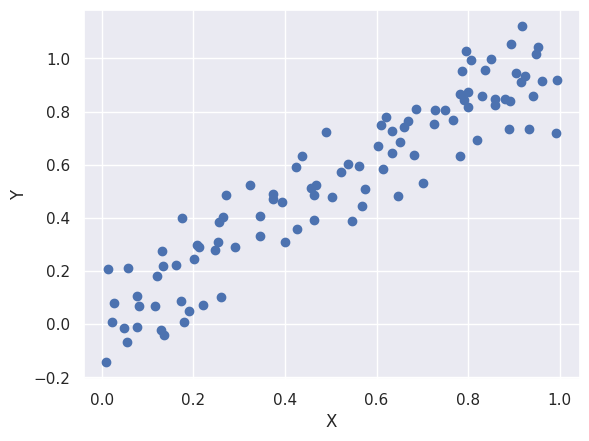

In [61]:
# Construct a variable Y which has a strong positive correlation with X
X = np.random.rand(100)
Y = X + np.random.normal(scale=0.1, size=100)

plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

print("Correlation between X and Y:", np.corrcoef(X, Y)[0, 1])

Correlation between Z and W: -0.099321992687433


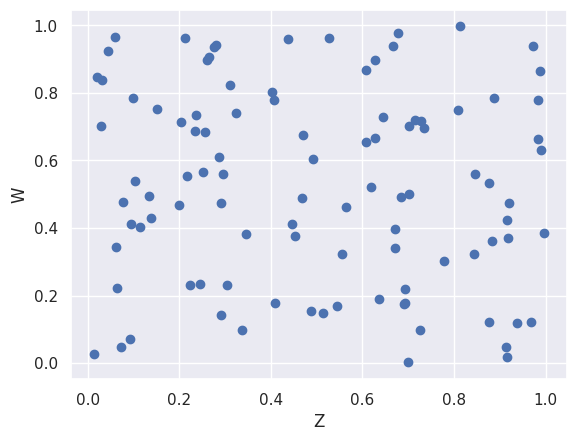

In [64]:
# Construct a variable W which has a weak, negative correlation with Z
Z = np.random.rand(100)
W = np.random.rand(100)

plt.scatter(Z, W)
plt.xlabel("Z")
plt.ylabel("W")

print("Correlation between Z and W:", np.corrcoef(Z, W)[0, 1])

#### Correlation of Real Assets

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

OKE and LAKE: 0.44581630912744646
OKE and SPY: 0.8550757087077938
LAKE and SPY: 0.6124832837118944


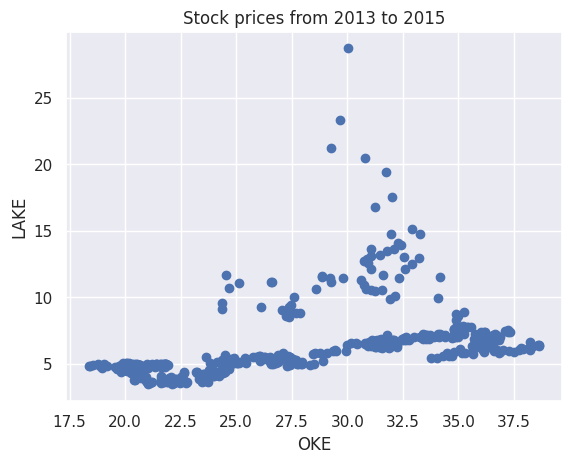

In [72]:
# Find the correlation between these two stocks and also check for the benchmark
OKE = yf.download('OKE', start='2013-01-01', end='2015-01-01')['Adj Close']
LAKE = yf.download('LAKE', start='2013-01-01', end='2015-01-01')['Adj Close']
benchmark = yf.download('^GSPC', start='2013-01-01', end='2015-01-01')['Adj Close']

plt.scatter(OKE, LAKE)
plt.xlabel("OKE")
plt.ylabel("LAKE")
plt.title("Stock prices from 2013 to 2015")
print("OKE and LAKE:", np.corrcoef(OKE, LAKE)[0, 1])
print("OKE and SPY:", np.corrcoef(OKE, benchmark)[0, 1])
print("LAKE and SPY:", np.corrcoef(LAKE, benchmark)[0, 1])

[                       0%%                      ]

[*********************100%%**********************]  5 of 5 completed

1 Failed download:
['SNOW']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1451624400")


The most correlated pair is ('GSK', 'AZO') with a value of 0.9575381870721431


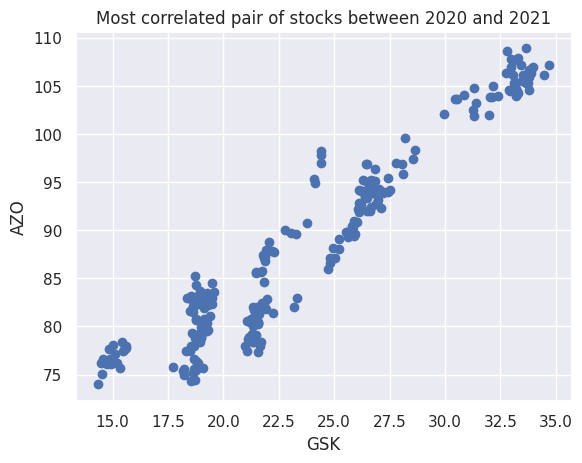

In [20]:
# Find the most correlated pair of stocks in the portfolio. 
symbol_list = ['GSK', 'SNOW', 'META', 'AZO', 'AMZN']
data = yf.download(symbol_list, start='2015-01-01', end='2016-01-01')['Adj Close']
data.columns = symbol_list

pair, value = find_most_correlated(data)

plt.scatter(data[pair[0]], data[pair[1]])
plt.title("Most correlated pair of stocks between 2020 and 2021")
plt.xlabel(pair[0])
plt.ylabel(pair[1])

print("The most correlated pair is %s with a value of %s" % (pair, value))

#### Limitations of Correlation

Using pricing data from the first half of 2016, find the correlation coefficient between META and AMZN and compare it to the relationship predicted from the 2015.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0.6512075940164825
0.9575381870721432


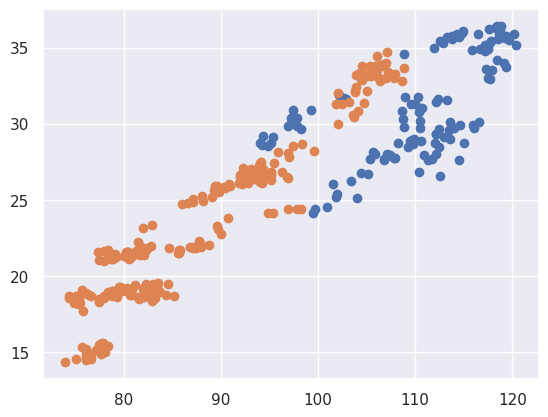

In [11]:
META_15 = yf.download('META', start='2015-01-01', end='2016-01-01')['Adj Close']
AMZN_15 = yf.download('AMZN', start='2015-01-01', end='2016-01-01')['Adj Close']
META_16 = yf.download('META', start='2016-01-01', end='2016-07-01')['Adj Close']
AMZN_16 = yf.download('AMZN', start='2016-01-01', end='2016-07-01')['Adj Close']

corr_16 = np.corrcoef(META_16, AMZN_16)
corr_15 = np.corrcoef(META_15, AMZN_15)

plt.scatter(META_16, AMZN_16)
plt.scatter(META_15, AMZN_15)

print(corr_16[0, 1])
print(corr_15[0, 1])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, '60-day Rolling Correlation')

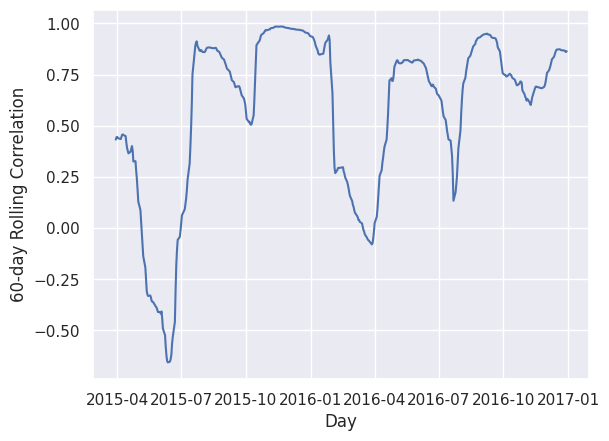

In [13]:
# Plot the 60-day correlation coefficient between META and AMZN
META = yf.download('META', start='2015-01-01', end='2017-01-01')['Adj Close']
AMZN = yf.download('AMZN', start='2015-01-01', end='2017-01-01')['Adj Close']

rolling_corr = META.rolling(60).corr(AMZN)
plt.plot(rolling_corr)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')